<a href="https://colab.research.google.com/github/Lindelani-3/Python-Notebooks/blob/mainBranch/dae_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# load the dataset
path = "DataSet.csv"
data = pd.read_csv(path)
data.head()

,Country,TotalArea,LandArea,WaterArea,Highest.point,Maximum.elevation,Lowest.point,Minimum.elevation,Pop2023
0,Tuvalu,26.0,26.0,0.0,Unnamed location on Niulakita,5.0,South Pacific Ocean,0.0,11396
1,Marshall Islands,181.0,181.0,11673.0,Unnamed location on Likiep,10.0,North Pacific Ocean,0.0,41996
2,Bahamas,13943.0,10010.0,3870.0,Mount Alvernia on Cat Island,63.0,North Atlantic Ocean,0.0,412624
3,Gambia,11295.0,10000.0,1295.0,Unnamed point,64.0,North Atlantic Ocean,0.0,2773168
4,Nauru,21.0,21.0,0.0,Command Ridge,65.0,South Pacific Ocean,0.0,1278


In [ ]:
data['Maximum.elevation'].describe()

count     172.000000
mean     2648.956395
std      2003.049729
min         5.000000
25%      1048.500000
50%      2511.500000
75%      3456.250000
max      8848.000000
Name: Maximum.elevation, dtype: float64

We are given data about 172 countries and we aim to investigate the correlation between each country's maximum point of elevation and it's other attributes, namely it's lowest point of elevation, the total area, land area, water area and population circa 2023. The data will not be split into training sets because we will be focusing on analysizing the given data, more than trying to predict it.

# **Single Variable Regression**

### ***Model 1A: Maximum Elevation - Total Area*** 

In [ ]:
data['TotalArea'].describe()

count    1.720000e+02
mean     5.879122e+05
std      1.693194e+06
min      2.020000e+00
25%      2.097325e+04
50%      1.195120e+05
75%      4.943550e+05
max      1.709825e+07
Name: TotalArea, dtype: float64

With the aim of predicting the maximum elevation of a country using only it's total area, we will first investigate the linear correlation between the two. Evidence of significant linear correlation between the two attributes will enable us to make (most likely) accurate predictions of one using the other.


Single variable regression: Total area
Slope:  [[0.00036852]]
Intercept:  [2432.29850218]


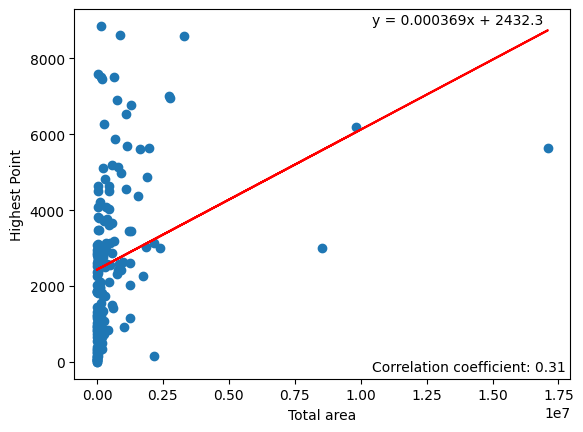

In [ ]:
# Single variable regression
# (a) The country's total area
X = data['TotalArea'].values.reshape(-1, 1)
Y = data['Maximum.elevation']
y = Y.values.reshape(-1, 1)
# Calculate correlation coefficient
corr_coeff = round(data['TotalArea'].corr(data['Maximum.elevation']), 2)
# regression
reg = LinearRegression().fit(X, y)
print('Single variable regression: Total area')
print('Slope: ', reg.coef_)
print('Intercept: ', reg.intercept_)

# Plot
y_pred = reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Total area')
plt.ylabel('Highest Point')
# Add correlation coefficient as text to the plot
plt.text(0.6, 0.02, f'Correlation coefficient: {corr_coeff}', transform=plt.gca().transAxes)
# Add line equation as text to the plot
plt.text(0.6, 0.96, 'y = {}x + {}'.format(round(reg.coef_[0][0], 6), round(reg.intercept_[0], 2)), transform=plt.gca().transAxes)
plt.show()


In [ ]:
# Print the R-squared score and the mean squared error
print('\nModel Performance:')
print('R-squared:', reg.score(X, Y))
print('Mean Squared Error:', np.mean((y_pred - y)**2))


Model Performance:
R-squared: 0.09704078752220369
Mean Squared Error: 3601797.229255919


The low R-Squared Score of approx. 0.097, indicates that some of the other attributes are more likely to have an influence on the maximum elevation. 
A high Mean Squared Error tells us that the model may not be a good fit for the data and thus predictions made amy not be accurate.

### ***Model 1B: Maximum Elevation - Total Area (removed outliers)***

From the scatter plot, we can clearly notice some extreme outliers in the data and remove them by using z-scores from the mean.

Single variable regression: Total area
Slope:  [[0.00150771]]
Intercept:  [2022.34522186]


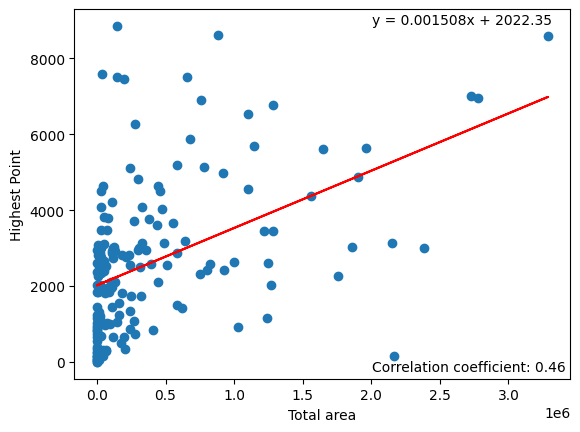

In [ ]:
# (a) The country's total area

# Calculate z-scores for TotalArea column
z_scores = stats.zscore(data['TotalArea'])
# Define threshold z-score for outliers
threshold = 3
# Identify outliers using threshold z-score
outliers = (z_scores > threshold) | (z_scores < -threshold)
# Remove outliers from DataFrame
data_2 = data.loc[~outliers]
X = data_2['TotalArea'].values.reshape(-1, 1)
Y = data_2['Maximum.elevation']
y = Y.values.reshape(-1, 1)
# Calculate correlation coefficient
corr_coeff = round(data_2['TotalArea'].corr(data_2['Maximum.elevation']), 2)
# regression
reg = LinearRegression().fit(X, y)
print('Single variable regression: Total area')
print('Slope: ', reg.coef_)
print('Intercept: ', reg.intercept_)

# Plot
y_pred = reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Total area')
plt.ylabel('Highest Point')
# Add correlation coefficient as text to the plot
plt.text(0.6, 0.02, f'Correlation coefficient: {corr_coeff}', transform=plt.gca().transAxes)
# Add line equation as text to the plot
plt.text(0.6, 0.96, 'y = {}x + {}'.format(round(reg.coef_[0][0], 6), round(reg.intercept_[0], 2)), transform=plt.gca().transAxes)
plt.show()


The presence of the outliers had an impact on the slope and intercept of the regression line as well as the correlation coefficient. Removing them has reduced their influence on the data.

The slope of the regression line increased from 0.00036852 to 0.00150771, indicating that for each unit increase in Total area (x), the Highest point is expected to increase on average by 0.00150771. The correlation coefficient also increased from 0.31 to 0.46, indicating that there is now a moderate positive linear relationship between the two variables. This means that the highest point in a country increases with total area of a country. It makes some intuitive sense numerically but in the real world the odds of finding a point that is geographicaly relatively high depends on many other factors.

The intercept also changed from 2432.29850218 to 2022.34522186, indicating that we expect a country with 0.00 Total area to have a highest point of 2022.345 and again, such numbers don't really make sense in the real world.

In [ ]:
# Print the R-squared score and the mean squared error
print('\nModel Performance:')
print('R-squared:', reg.score(X, Y))
print('Mean Squared Error:', np.mean((y_pred - y)**2))


Model Performance:
R-squared: 0.21426544313754892
Mean Squared Error: 3088015.2938356944


We get quite a relatively better r-squared score than Model 1A after we've dealt with the outliers. This allows for the assumption that the Total Area may be one of the factors that have an influence on the highest point of a country. The two are relatively linearly correlated.
The MSE is still a bit high though and this suggests that even though there is some linear correlation between the totat area and the maximum point of elevation, the model may still not be accurate in making predictions.


### ***Model 2A: Maximum Elevation - Lowest Point of Elevation***

In [ ]:
data['Minimum.elevation'].describe()

count     172.000000
mean       47.251744
std       195.211659
min      -428.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1400.000000
Name: Minimum.elevation, dtype: float64

Now we want to try and predict the highest point of elevation using the lowest point. If we are able to find a strong linear correlation between the two, then our model will be able to make predictions that would be most likely accurate. 


Single variable regression: Lowest point
Slope:  [[1.47231474]]
Intercept:  [2579.38695566]


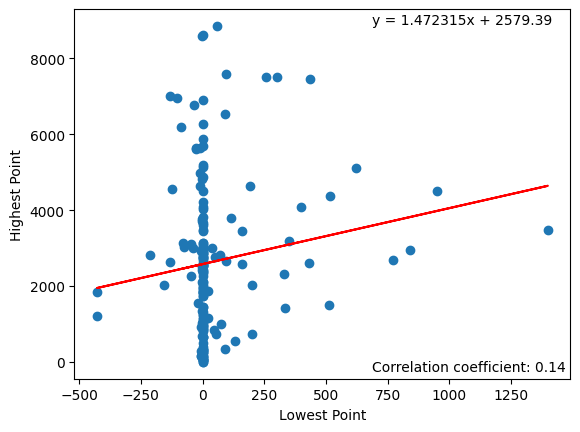

In [ ]:
# (b) The country's lowest point
X = data['Minimum.elevation'].values.reshape(-1, 1)
Y = data['Maximum.elevation']
y = Y.values.reshape(-1, 1)
# Calculate correlation coefficient
corr_coeff = round(data['Minimum.elevation'].corr(data['Maximum.elevation']), 2)
reg = LinearRegression().fit(X, y)
print('Single variable regression: Lowest point')
print('Slope: ', reg.coef_)
print('Intercept: ', reg.intercept_)

# Plot
y_pred = reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Lowest Point')
plt.ylabel('Highest Point')
# Add correlation coefficient as text to the plot
plt.text(0.6, 0.02, f'Correlation coefficient: {corr_coeff}', transform=plt.gca().transAxes)
# Add line equation as text to the plot
plt.text(0.6, 0.96, 'y = {}x + {}'.format(round(reg.coef_[0][0], 6), round(reg.intercept_[0], 2)), transform=plt.gca().transAxes)
plt.show()

In [ ]:
# Print the R-squared score and the mean squared error
print('\nModel Performance:')
print('R-squared:', reg.score(X, Y))
print('Mean Squared Error:', np.mean((y_pred - y)**2))


Model Performance:
R-squared: 0.020588720787418024
Mean Squared Error: 3906755.4580784757


With a very low r-squared score of approximately 0.02, we can assume there is little to suggest that the two variables are linearly correlated.
We also have a very high MSE of about 3 906 755 and this (which makes sense) indicates that the model may not be a good fit for the data, and that our predictions of the maximum point of elevation would most likely be inaccurate.


### ***Model 2B: Maximum Elevation - Lowest Point of Elevation (removed outliers)***

Checking and removal of outliers using z-scores

Single variable regression: Lowest point
Slope:  [[2.45509211]]
Intercept:  [2570.11490977]


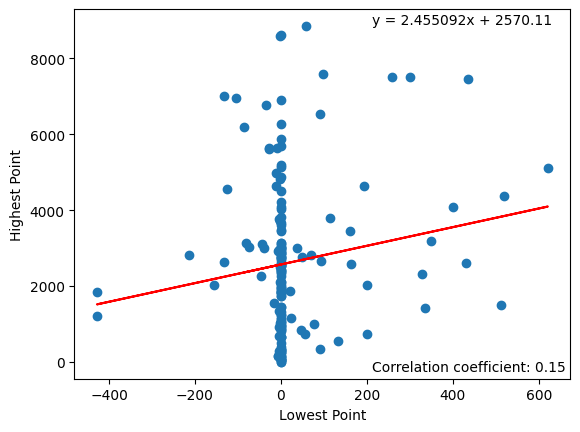

In [ ]:
# (b) The country's lowest point

# Calculate z-scores for TotalArea column
z_scores = stats.zscore(data['Minimum.elevation'])
# Define threshold z-score for outliers
threshold = 3
# Identify outliers using threshold z-score
outliers = (z_scores > threshold) | (z_scores < -threshold)
# Remove outliers from DataFrame
data_2 = data.loc[~outliers]
X = data_2['Minimum.elevation'].values.reshape(-1, 1)
Y = data_2['Maximum.elevation']
y = Y.values.reshape(-1, 1)
# Calculate correlation coefficient
corr_coeff = round(data_2['Minimum.elevation'].corr(data_2['Maximum.elevation']), 2)

reg = LinearRegression().fit(X, y)
print('Single variable regression: Lowest point')
print('Slope: ', reg.coef_)
print('Intercept: ', reg.intercept_)

# Plot
y_pred = reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Lowest Point')
plt.ylabel('Highest Point')
# Add correlation coefficient as text to the plot
plt.text(0.6, 0.02, f'Correlation coefficient: {corr_coeff}', transform=plt.gca().transAxes)
# Add line equation as text to the plot
plt.text(0.6, 0.96, 'y = {}x + {}'.format(round(reg.coef_[0][0], 6), round(reg.intercept_[0], 2)), transform=plt.gca().transAxes)
plt.show()

The presence of the outliers had little impact on the slope and intercept of the regression line as well as the correlation coefficient.

The slope of the regression line increased from 1.47231474 to 2.45509211, indicating that for each unit increase in Lowest point (x), the Highest point is expected to increase on average by 2.45509211. The correlation coefficient also increased from 0.14 to 0.15, indicating that there is almost no linear relationship between the two variables. There isn't much increase in a country's highest point with increase in lowest point. It makes some intuitive sense because there isn't much of a relationship between a country's highest and lowest points in the real world.

The intercept also changed from 2579.38695566 to 2570.11490977. Since the lowest point will continue to decrease, we expect a country with lowest point < -400 to have a highest point of < 2570.11490977. 

In [ ]:
# Print the R-squared score and the mean squared error
print('\nModel Performance:')
print('R-squared:', reg.score(X, Y))
print('Mean Squared Error:', np.mean((y_pred - y)**2))


Model Performance:
R-squared: 0.023277760829943372
Mean Squared Error: 3963864.1660607755


In comparison to Model 2A, we get a relatively higher r-squared score, 0.02328 > 0.02059, but still not high enough to assume any linear correlation.
Our model's MSE is still quite high at about 3 963 864, and understandably so, this means the predictions of maximum elvations our model would make, using the lowest point, would most likely be inaccurate.



# ***Multiple variable regression***

Multiple variable regression
Coefficients:  [[ 1.89833888e+00  2.65658303e-01 -2.65344176e-01 -2.66884870e-01
   5.35946093e-06]]
Intercept:  [2186.63521037]




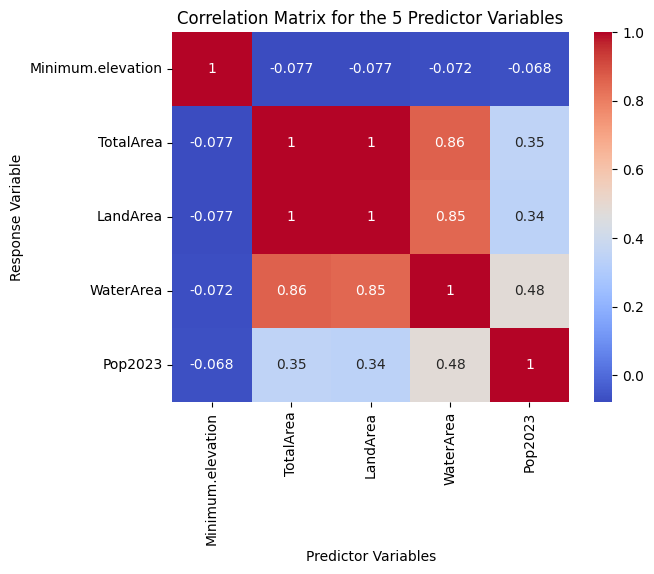

In [ ]:
# Multiple variable regression
X = data[['Minimum.elevation', 'TotalArea', 'LandArea', 'WaterArea', 'Pop2023']].values
y = data['Maximum.elevation'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print('Multiple variable regression')
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)
print('\n')

# Plot
# Select the 5 predictor variables
predictors = ['Minimum.elevation', 'TotalArea', 'LandArea', 'WaterArea', 'Pop2023']

# Compute the correlation matrix
corr = data[predictors].corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Add plot title and axis labels
plt.title('Correlation Matrix for the 5 Predictor Variables')
plt.xlabel('Predictor Variables')
plt.ylabel('Response Variable')

# Display the plot
plt.show()